# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

# Reading Raw_Data

In [2]:
data = pd.read_csv("D:/Machine Learning in Python/Tasks/data/medical.tsv", sep='\t')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe(include ='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Preprocessing

C:\Users\raj13\anaconda3\envs\Tensorflow_Env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

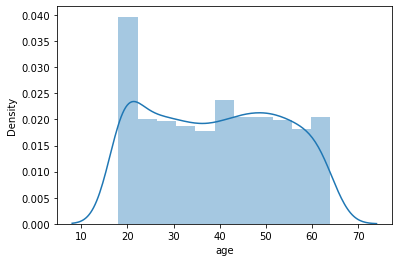

In [5]:
sns.distplot(data['age'])

C:\Users\raj13\anaconda3\envs\Tensorflow_Env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

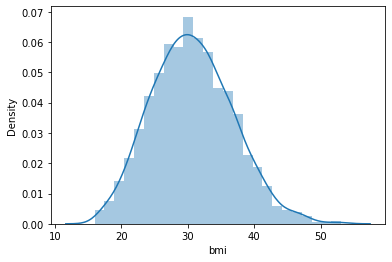

In [6]:
sns.distplot(data['bmi'])

C:\Users\raj13\anaconda3\envs\Tensorflow_Env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

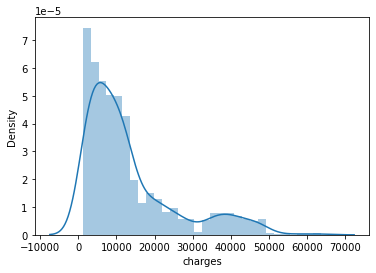

In [7]:
sns.distplot(data['charges'])

C:\Users\raj13\anaconda3\envs\Tensorflow_Env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

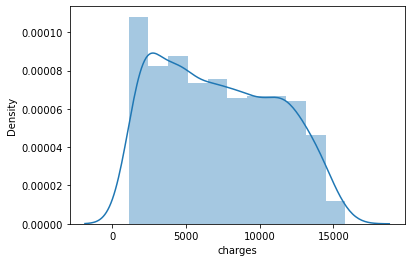

In [8]:
q = data['charges'].quantile(0.74)
data_1 = data[data['charges'] < q]
sns.distplot(data_1['charges'])

In [9]:
data_cleaned = data_1.reset_index(drop = True)

In [10]:
data_cleaned.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,990.000000,990,990.000000,990.000000,990,990,990.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southwest,NaN
freq,NaN,508,NaN,NaN,979,254,NaN
mean,38.924242,NaN,30.493000,1.064646,NaN,NaN,7195.369852
std,14.073522,NaN,6.167417,1.214116,NaN,NaN,3937.515613
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.030000,0.000000,NaN,NaN,3741.503925
50%,39.000000,NaN,30.200000,1.000000,NaN,NaN,6867.220300
75%,51.000000,NaN,34.320000,2.000000,NaN,NaN,10563.786300


# Generating Dummies

In [11]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first= True)

In [12]:
data_with_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,18,33.77,1,1725.5523,1,0,0,1,0
1,28,33.00,3,4449.4620,1,0,0,1,0
2,32,28.88,0,3866.8552,1,0,1,0,0
3,31,25.74,0,3756.6216,0,0,0,1,0
4,46,33.44,1,8240.5896,0,0,0,1,0


In [13]:
new_data = data_with_dummies.copy()

# Checking the OLS assumptions

Text(0.5, 1.0, 'children and charges')

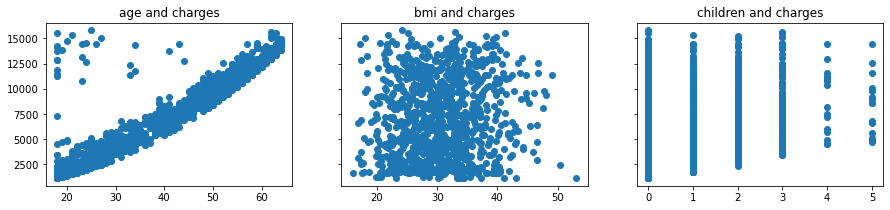

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['age'],data_cleaned['charges'])
ax1.set_title('age and charges')
ax2.scatter(data_cleaned['bmi'],data_cleaned['charges'])
ax2.set_title('bmi and charges')
ax3.scatter(data_cleaned['children'],data_cleaned['charges'])
ax3.set_title('children and charges')

### Relaxing the assumptions

In [15]:
log_charges = np.log(new_data['charges'])
new_data['log_charges'] = log_charges
new_data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,log_charges
0,18,33.77,1,1725.5523,1,0,0,1,0,7.453302
1,28,33.00,3,4449.4620,1,0,0,1,0,8.400538
2,32,28.88,0,3866.8552,1,0,1,0,0,8.260197
3,31,25.74,0,3756.6216,0,0,0,1,0,8.231275
4,46,33.44,1,8240.5896,0,0,0,1,0,9.016827
...,...,...,...,...,...,...,...,...,...,...
985,52,44.70,3,11411.6850,0,0,0,0,1,9.342393
986,50,30.97,3,10600.5483,1,0,1,0,0,9.268661
987,18,31.92,0,2205.9808,0,0,0,0,0,7.698927
988,18,36.85,0,1629.8335,0,0,0,1,0,7.396233


In [16]:
new_data = new_data.drop(['charges'] , axis = 1)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = new_data[['age','bmi','children']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [19]:
vif

,VIF,Features
0,7.569089,age
1,7.871461,bmi
2,1.741240,children


Text(0.5, 1.0, 'children and log_charges')

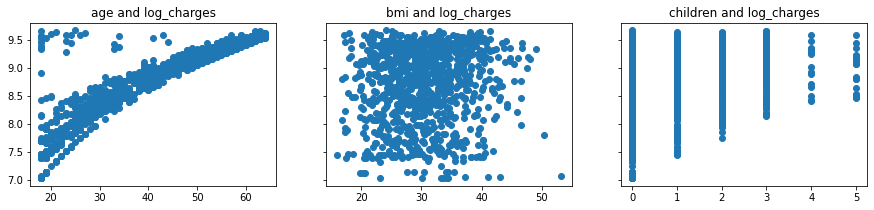

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(new_data['age'],new_data['log_charges'])
ax1.set_title('age and log_charges')
ax2.scatter(new_data['bmi'],new_data['log_charges'])
ax2.set_title('bmi and log_charges')
ax3.scatter(new_data['children'],new_data['log_charges'])
ax3.set_title('children and log_charges')

# scaling the Inputs

In [21]:
targets = new_data['log_charges']
inputs = new_data.drop(['log_charges'], axis =1)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [23]:
scaled_inputs = scaler.transform(inputs)

In [24]:
targets

0      7.453302
1      8.400538
2      8.260197
3      8.231275
4      9.016827
         ...   
985    9.342393
986    9.268661
987    7.698927
988    7.396233
989    7.604867
Name: log_charges, Length: 990, dtype: float64

# Linear regression model

In [25]:
x_train, x_test, y_train, y_test = train_test_split (inputs, targets, test_size= 0.33, random_state = 365)

In [26]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [27]:
y_hat = reg.predict(x_train)

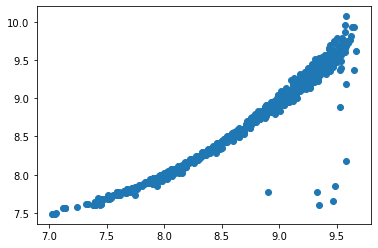

In [28]:
plt.scatter(y_train, y_hat)
plt.show()

C:\Users\raj13\anaconda3\envs\Tensorflow_Env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_charges', ylabel='Density'>

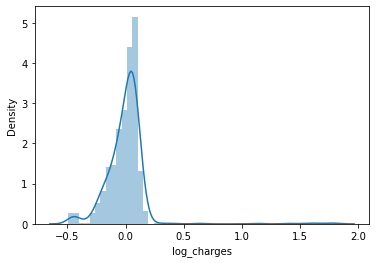

In [29]:
sns.distplot(y_train - y_hat)

### Finding the weights and bias 

In [30]:
reg.score(x_train, y_train)

0.9158062381484842

In [31]:
reg.intercept_

6.983105841640241

In [32]:
reg.coef_

array([ 4.34080436e-02,  2.55815250e-04,  1.21757695e-01, -1.17540943e-01,
        1.71168245e+00, -5.16088928e-02, -1.65404148e-01, -1.35744532e-01])

In [33]:
reg_summary= pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,0.043408
1,bmi,0.000256
2,children,0.121758
3,sex_male,-0.117541
4,smoker_yes,1.711682
5,region_northwest,-0.051609
6,region_southeast,-0.165404
7,region_southwest,-0.135745


# Testing

In [34]:
y_hat_test = reg.predict(x_test)

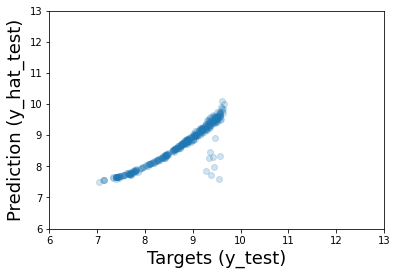

In [35]:
plt.scatter(y_test, y_hat_test, alpha= .2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Prediction (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [36]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,2283.627413
1,9554.315188
2,7278.543418
3,4170.713010
4,1791.923472


In [37]:
df_pf['targets'] = np.exp(y_test)
df_pf.head()

,Prediction,targets
0,2283.627413,1725.5523
1,9554.315188,NaN
2,7278.543418,NaN
3,4170.713010,NaN
4,1791.923472,NaN


In [39]:
y_test = y_test.reset_index(drop= True)

In [40]:
df_pf['targets'] = np.exp(y_test)
df_pf.head()

,Prediction,targets
0,2283.627413,1909.52745
1,9554.315188,9617.66245
2,7278.543418,7358.17565
3,4170.713010,14358.36437
4,1791.923472,1141.44510


In [41]:
df_pf['Residual'] = df_pf['targets'] -df_pf['Prediction']

In [42]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['targets'] * 100)

In [43]:
df_pf

,Prediction,targets,Residual,Difference%
0,2283.627413,1909.52745,-374.099963,19.591233
1,9554.315188,9617.66245,63.347262,0.658655
2,7278.543418,7358.17565,79.632232,1.082228
3,4170.713010,14358.36437,10187.651360,70.952729
4,1791.923472,1141.44510,-650.478372,56.987267
...,...,...,...,...
322,3231.456849,3260.19900,28.742151,0.881607
323,2468.948472,2166.73200,-302.216472,13.948032
324,7604.404699,7639.41745,35.012751,0.458317
325,13483.995493,11015.17470,-2468.820793,22.412906


In [44]:
df_pf.describe()

,Prediction,targets,Residual,Difference%
count,327.000000,327.000000,327.000000,327.000000
mean,7402.010306,7498.814620,96.804314,10.966053
std,4495.854848,4044.776091,1836.964251,13.698778
min,1791.923472,1141.445100,-9702.202833,0.096152
25%,3567.306695,3951.742275,-360.188398,3.773141
50%,6549.135632,7201.700850,144.472103,7.041052
75%,10256.849709,10874.593450,420.039132,11.493943
max,24708.782283,15612.193350,12117.101337,85.736001


In [45]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,targets,Residual,Difference%
247,12359.04,12347.17,-11.87,0.10
33,6885.29,6877.98,-7.31,0.11
30,10811.34,10825.25,13.91,0.13
96,9556.29,9541.70,-14.59,0.15
150,3261.87,3268.85,6.98,0.21
81,6817.81,6799.46,-18.35,0.27
83,12276.85,12233.83,-43.02,0.35
324,7604.40,7639.42,35.01,0.46
297,2881.72,2867.12,-14.60,0.51
1,9554.32,9617.66,63.35,0.66
